# RQ1
- Main research question: _'Can content-based filtering using metadata enhance the current recommendation system of NPO Start which uses collaborative filtering?'_
- RQ1: _'What is the current collaborative filtering performance?'_

## Context
NPO Start employs recommendations in a ribbon called 'Aanbevolen voor jou'. In such a ribbon several items that suit a user are shown which are based on the history of actions. 

The current recommendation system employs collaborative filtering on the series watched by an user. For each serie coincidental series that are watched together are matched, resulting in a list of (serie, serie) tuples that are frequently watched together. The top 100 of these frequent coincidences are then used to output a list for a single user.  

## Operationalization
#### Evaluation
Two measures are used to investigate this research question: CTR (click-through rate) and NDCG (normalized discounted cumulative gain). 

The CTR measures how often a user clicks on/ chooses a recommended item in the ribbon if it is chosen by a user.
\begin{equation}
CTR = \frac{\textit{number of click-throughs}}{\textit{number of offers}} * 100\%
\end{equation}

The NDCG asseses the ranking quality of the recommended items in the ribbon. This metric is higher when relevant items are placed earlier in the recommended items.
\begin{equation*}
DCG = \sum_{i=1}^{N}\frac{r_{i}}{log_2(i+1)} \\
NDCG = \frac{DCG}{IDCG}
\end{equation*}

#### Data
The events of the npo are used for this, which are preprocessed to gather events only pertaining to NPO Start, generated by an recommendation algorithm and existing on the 'Aanbevolen voor jou' ribbon.

#### Experimental setup 
For the offline situation the CTR and NDCG will be investigated over a period of 22 days (1 - 22 April 2019). The first 21 days are denoted as the training set, since the current recommendation algorithm uses a history of 21 days to generate a personalised list for a user. The remaining day is denoted as the test set.

For the online situation the CTR and NDCG are assessed based on the period the online experiment is ran.

## Result

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyspark.sql.functions as sf
plt.style.use('bmh')

### CTR

Table displaying the total amount of event counts, offers, choices and the accompanying ctr per day.

In [17]:
ctr_data = spark.read.csv('gs://dataproc-jupyter-eileen.npo-data.nl/data/movielens/data_ctr.csv', header=True, sep = ';')
df = ctr_data.toPandas()
for x in df.columns:
    df[x] = pd.to_numeric(df[x])
df['ctr'] = df['choice']/df['offer']*100
df

,dayofmonth,choice,offer,ctr
0,1,232,27196,0.853067
1,2,240,29682,0.808571
2,3,229,28799,0.795166
3,4,228,28846,0.790404
4,5,179,28109,0.636807
5,6,261,36824,0.708777
6,7,264,37633,0.701512
7,8,214,33244,0.643725
8,9,237,28525,0.830850
9,10,213,26188,0.813350


A lineplot displayig the amount of choices made by users in comparison to the amount of times an user is shown the ribbon.

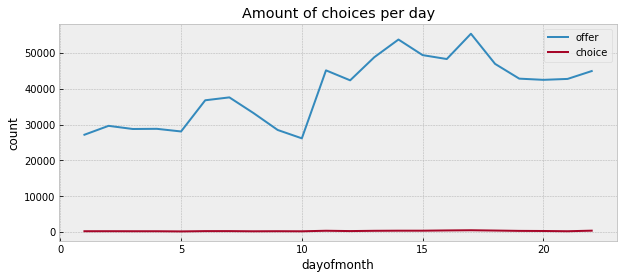

In [15]:
plt.figure(figsize = (10,4))
ax = sns.lineplot(x="dayofmonth", y="offer",data=df, label="offer")
ax = sns.lineplot(x="dayofmonth", y="choice",data=df, label="choice")
plt.title("Amount of choices per day")
plt.ylabel("count")
plt.show()

The CTR per day

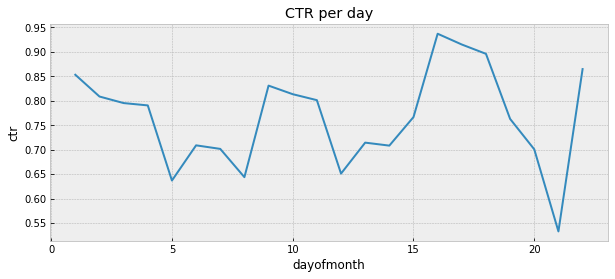

In [16]:
plt.figure(figsize = (10,4))
ax = sns.lineplot(x="dayofmonth", y="ctr",data=df)
plt.title("CTR per day")
plt.show()

### NDCG

Table displaying the average ndcg of lists per day.

In [46]:
ndcg_data = spark.read.parquet('gs://dataproc-jupyter-eileen.npo-data.nl/data/data_ndcg')
df2 = ndcg_data.toPandas()
for x in df2.columns:
    df2[x] = pd.to_numeric(df2[x])
df2

,dayofmonth,index,numberDisplayed,number,ndcg
0,1,4.650862,14.896552,5.650862,0.538346
1,2,4.912500,14.283333,5.912500,0.531687
2,3,4.248908,15.196507,5.248908,0.533281
3,4,4.982456,14.061404,5.982456,0.529715
4,5,5.452514,13.346369,6.452514,0.486713
5,6,4.674330,14.264368,5.674330,0.542570
6,7,4.280303,12.977273,5.280303,0.549115
7,8,4.925234,14.962617,5.925234,0.548904
8,9,5.345992,14.877637,6.345992,0.494122
9,10,5.032864,15.741784,6.032864,0.516532


The NDCG of choices per day

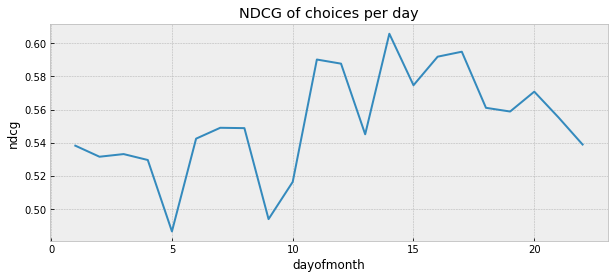

In [45]:
plt.figure(figsize = (10,4))
ax = sns.lineplot(x="dayofmonth", y="ndcg",data=df2)
plt.title("NDCG of choices per day")
plt.show()